In [1]:
import os, sys
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
sys.path.append('/home/jp/projects/python_tools')
import jp_mpl as jplot
from itertools import cycle
from scipy.stats import truncnorm

In [19]:

def plotContact(position, direction):


    pmt_size = 95.
    #plt.plot()
    #plt.figure()
    fig, ax = plt.subplots()
    circle1 = plt.Circle((0, 0), 95, color='r')
    ax.add_artist(circle1)

    depths = [56.7, 59, 113.]
    for d in depths:
        t = d/direction[2]

        x = position[0] + direction[0]*t
        y = position[1] + direction[1]*t
        plt.plot(x,y, 'x', markersize=10)

    plt.xlim([-200,200])
    plt.ylim(-200,200)
    return



In [20]:

def thetaChange(direction, direction_new):
    original_angle = np.arccos(-direction[2])
    new_angle = np.arccos(direction_new[2])
    
    print 'Angles', original_angle, new_angle
    print 'Difference', new_angle-original_angle

In [28]:
def PMTmultiple(random_value, dir_z):
    theta_i = np.arccos(-dir_z)
    rot_angle = 0.603749333397
    delta = (random_value - theta_i *np.sin(rot_angle))/np.cos(rot_angle)
    print delta

def PMTsingle(random_value, dir_z):
    rot_angle = np.pi/4.
    theta_i = np.arccos(-dir_z)
    delta = (random_value - theta_i *np.sin(rot_angle))/np.cos(rot_angle)
    print delta

def PMTreflections( dirz, radius):
    rot_angle = 1.56686777558
    value = -dirz*np.sin(rot_angle) + radius*np.cos(rot_angle)
    print value

    
def CONCrefPDF(dirz):
    x = np.arccos(-dirz)
    value = -0.3794*x**5 - 0.3118*x**4 + 2.51*x**3 - 2.745*x**2 + 1.005*x + 0.8163
    print 'Concentrator reflection PDF', value

 Angles 1.40593960201 1.38850033155
Difference -0.0174392704671
Radius  90.5419007754
PMT parameters
0.361125065745
-0.200800736377
0.261645257908
CONC parameters
Concentrator reflection PDF 0.476368670506


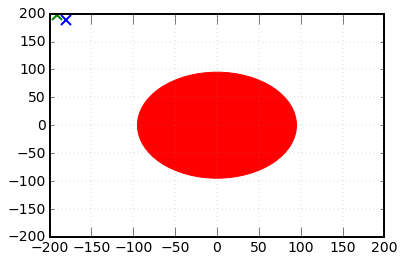

In [32]:

position=[87.9899, -21.3451, 130.4]
direction=[0.7764, -0.608498, -0.164111]
direction_new=[-0.933287, -0.310017, 0.181288]

plotContact(position,direction)
thetaChange(direction,direction_new)

myrand = 0.458801#None
print 'Radius ', np.sqrt(position[0]**2 + position[1]**2)

print 'PMT parameters'
PMTmultiple(myrand,-0.959803 )
PMTreflections(myrand, 65.6724)
PMTsingle( 0.487763 , -0.909733)

print 'CONC parameters'
CONCrefPDF(direction[2])